<a href="https://colab.research.google.com/github/Hanyawael/GTC-Heart-Disease-Risk-Prediction/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Liberaries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Reading Data

In [2]:
df = pd.read_csv('framingham.csv')

# Details of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.shape

(4240, 16)

#EDA

In [6]:
# Missing values
df.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [7]:
# Filling Missing values
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)


/tmp/ipython-input-2125968714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['glucose'].fillna(df['glucose'].median(), inplace=True)
/tmp/ipython-input-2125968714.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [8]:
categorical_cols = ['education', 'BPMeds']

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

/tmp/ipython-input-4134465366.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [9]:
df.isna().sum() #after handling

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


# Heatmap

# Outliers


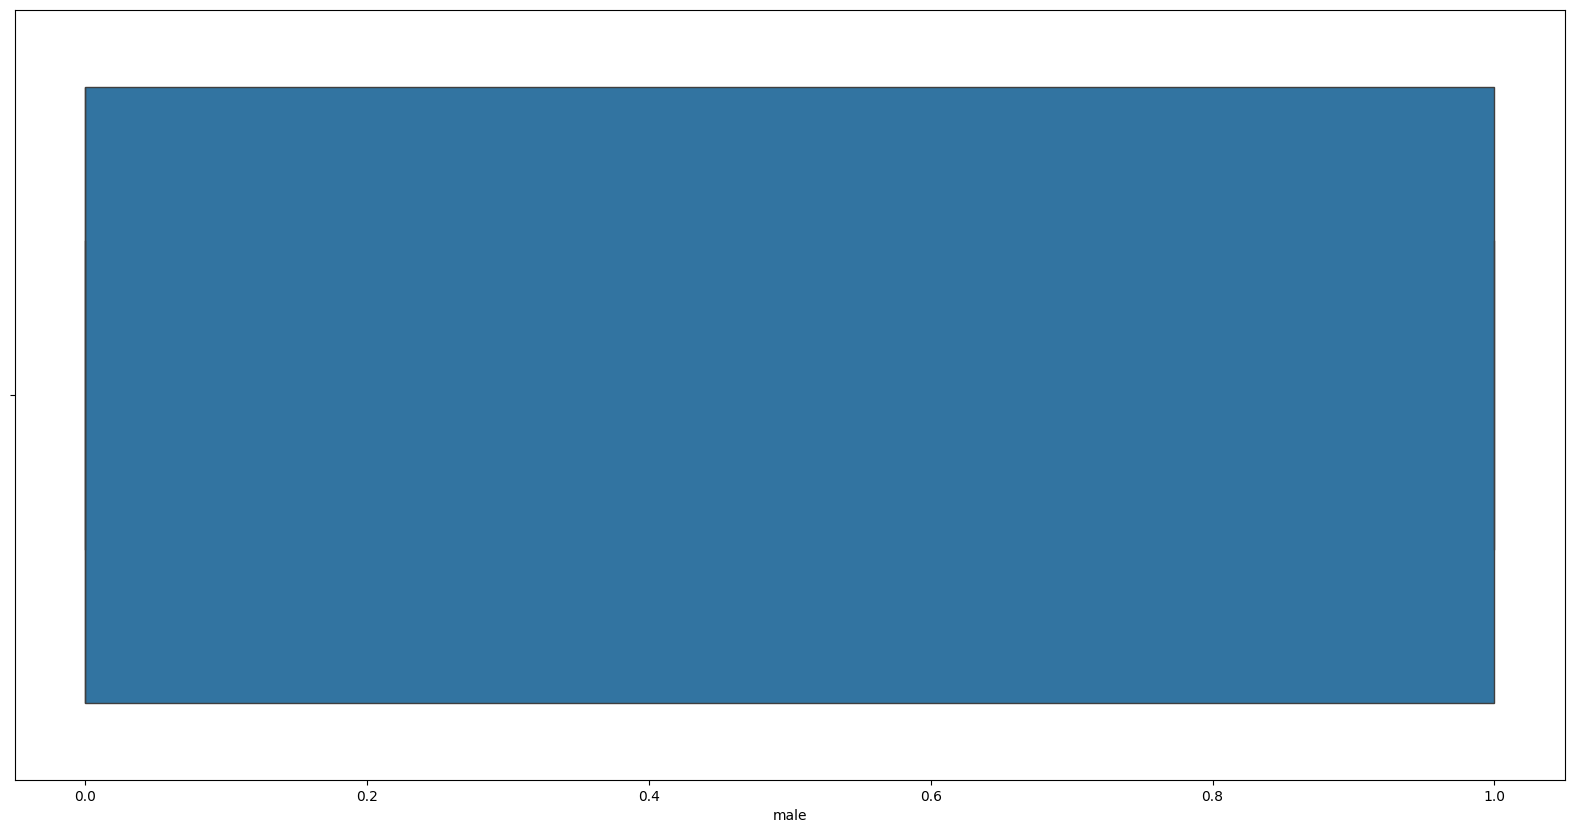

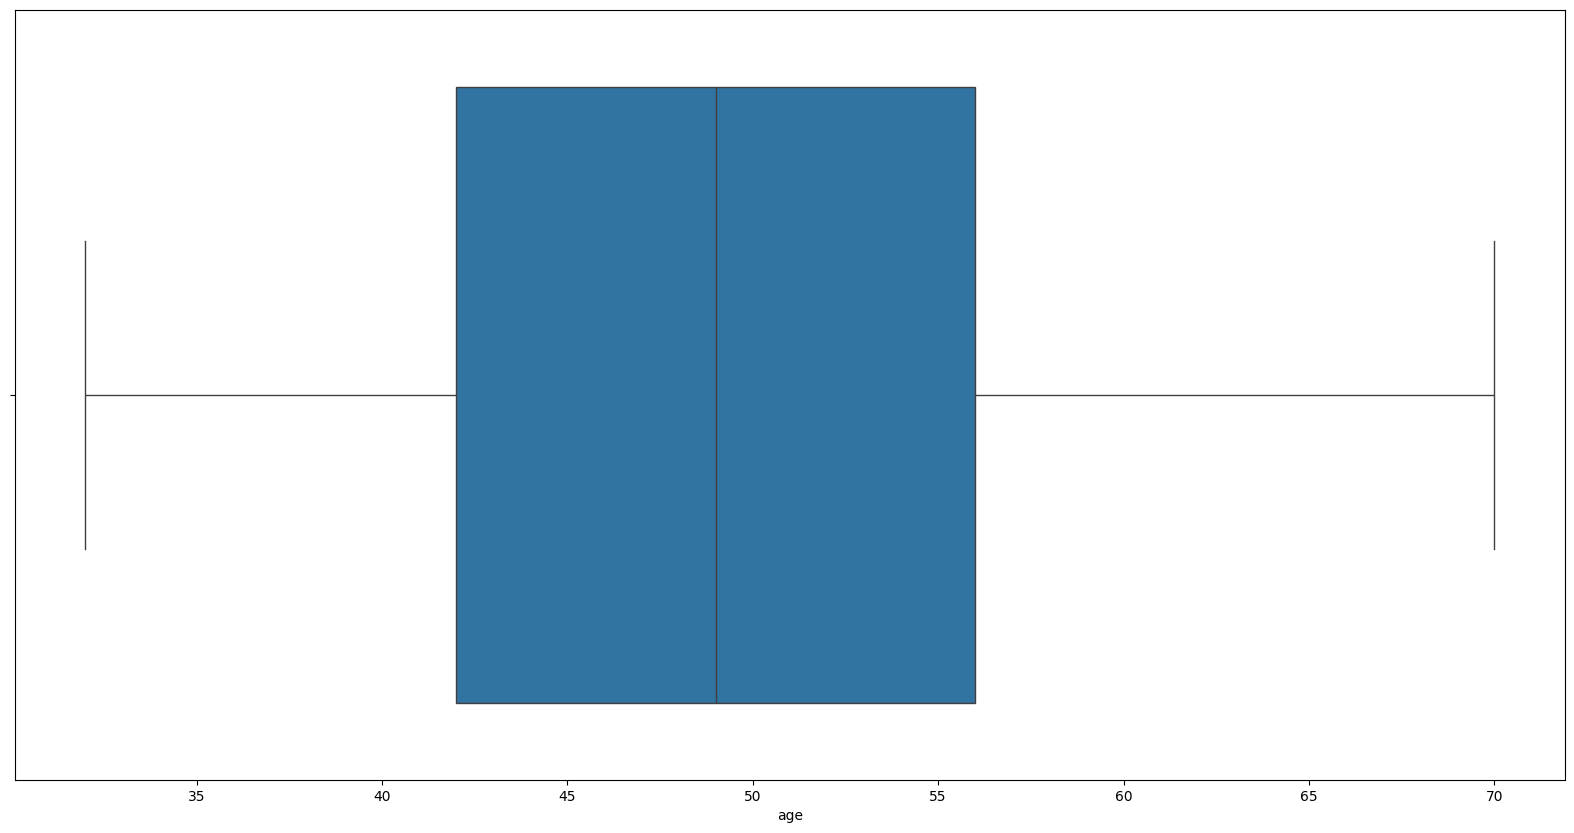

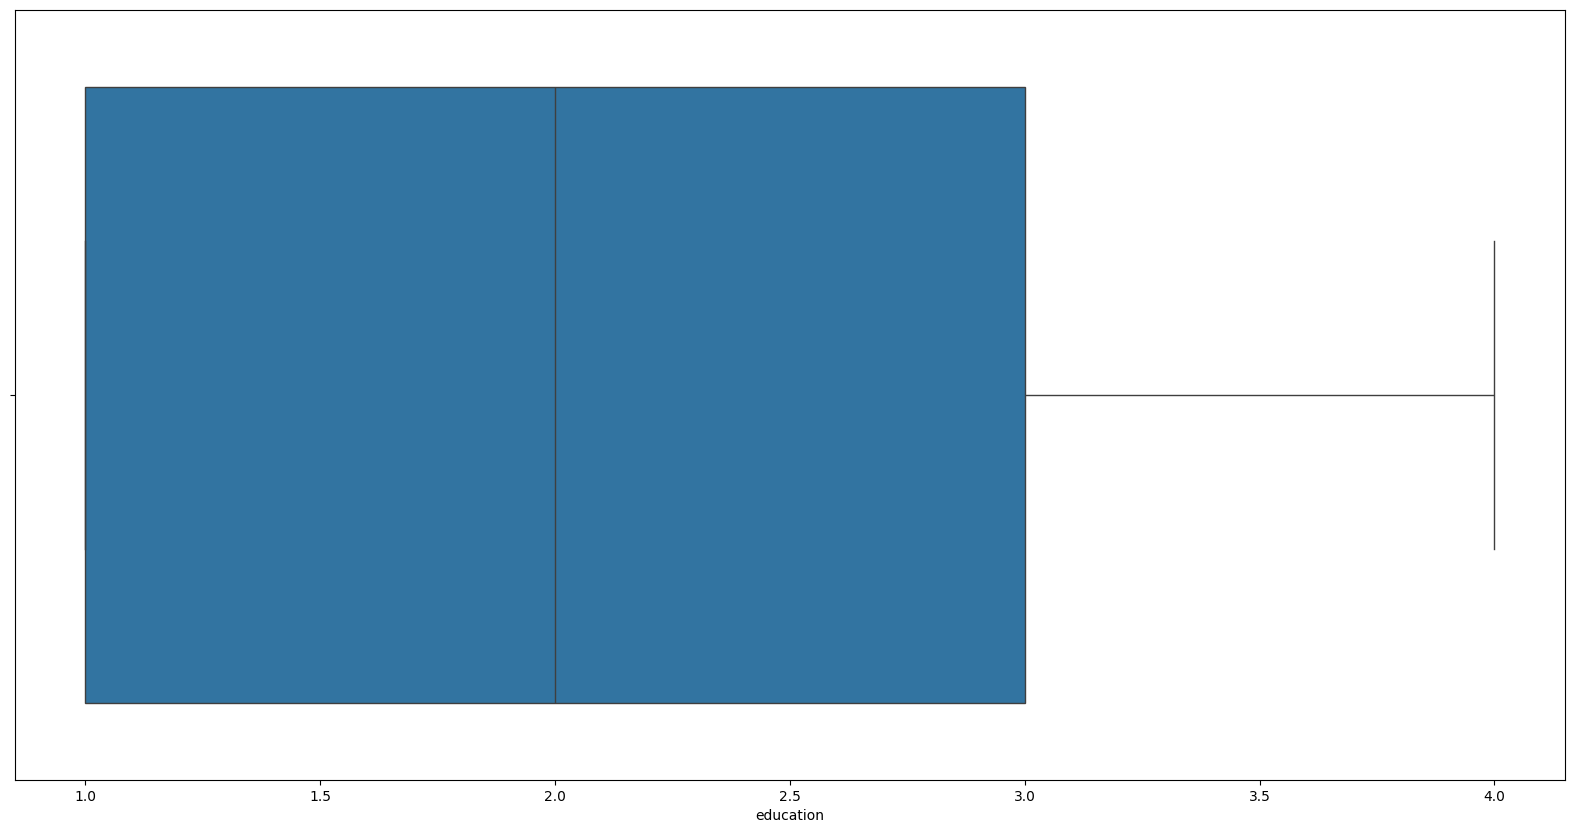

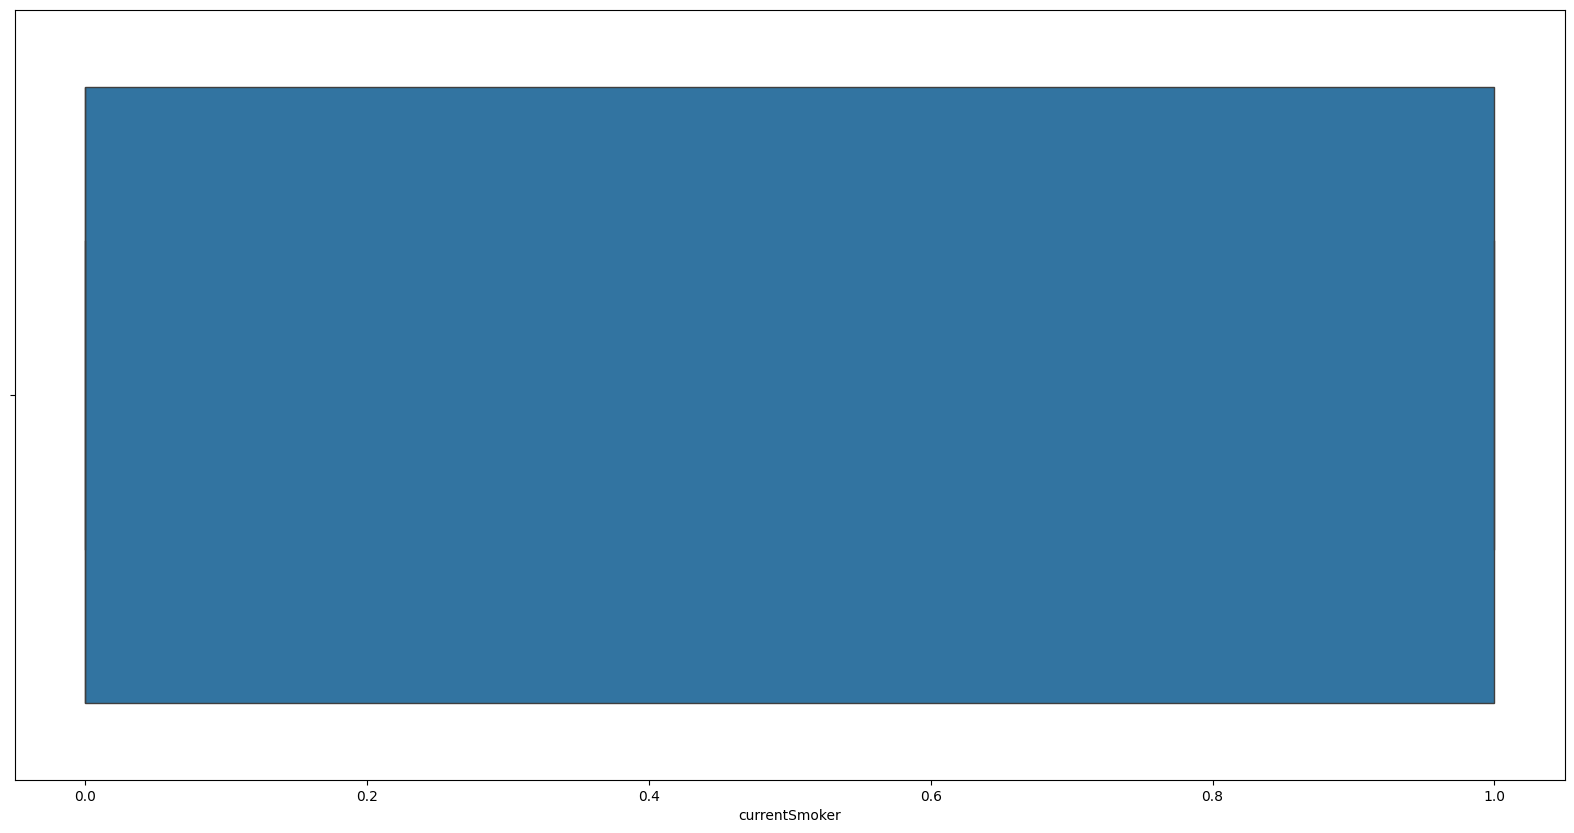

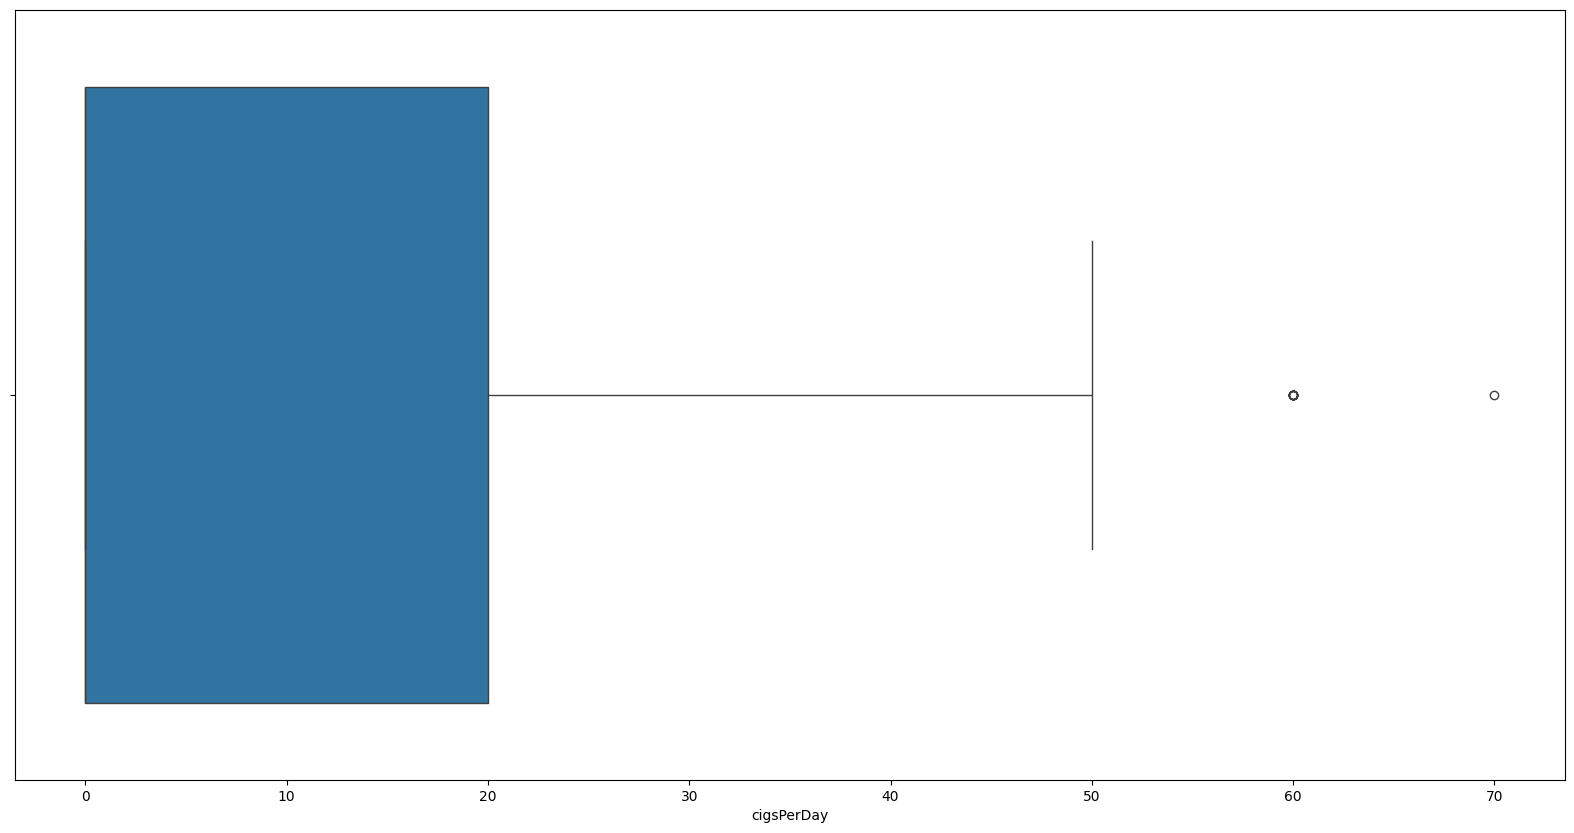

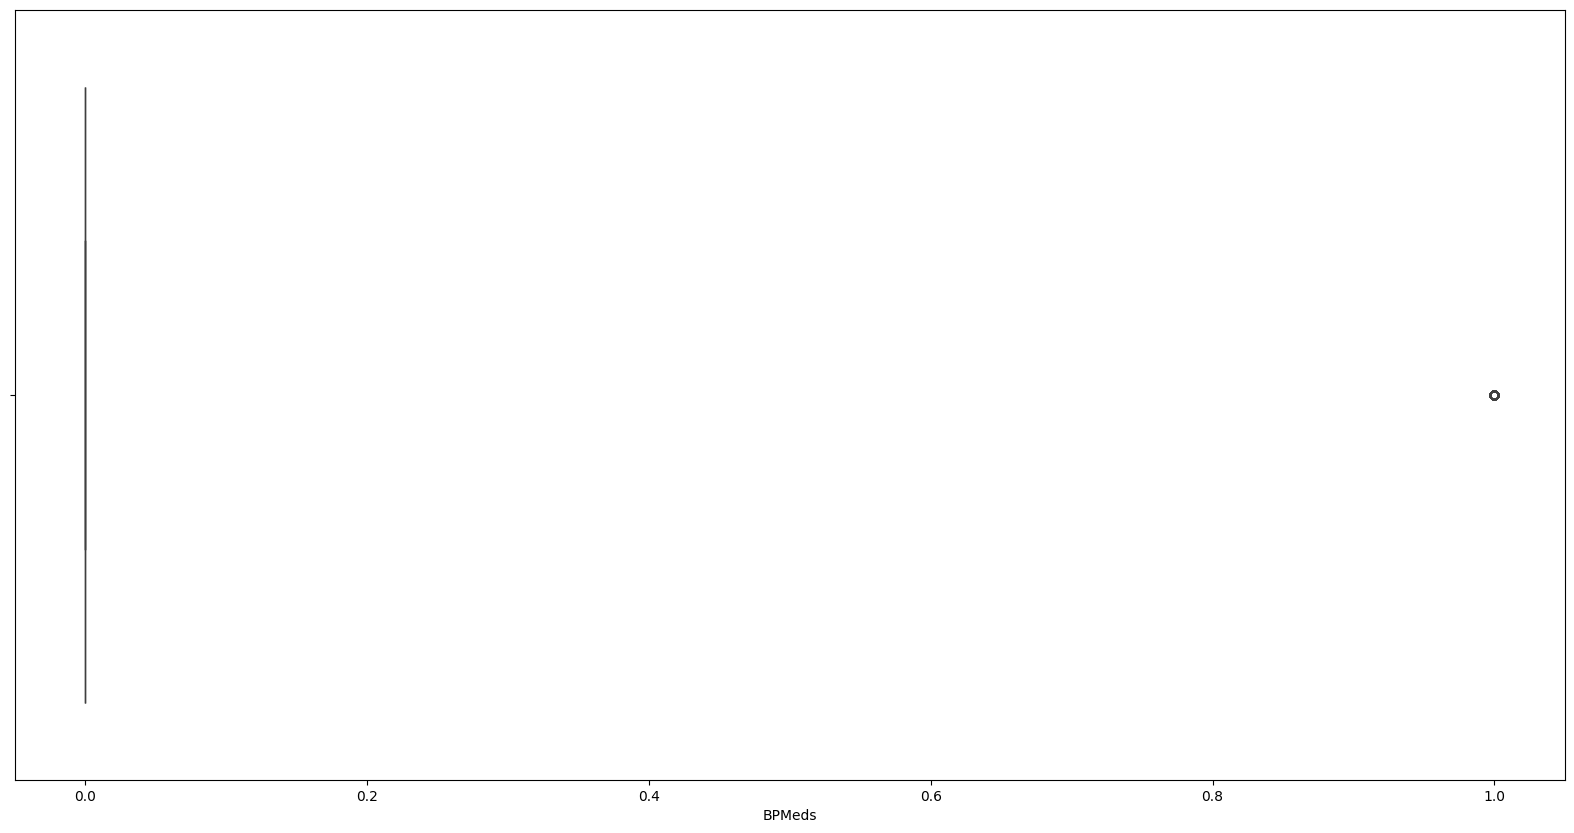

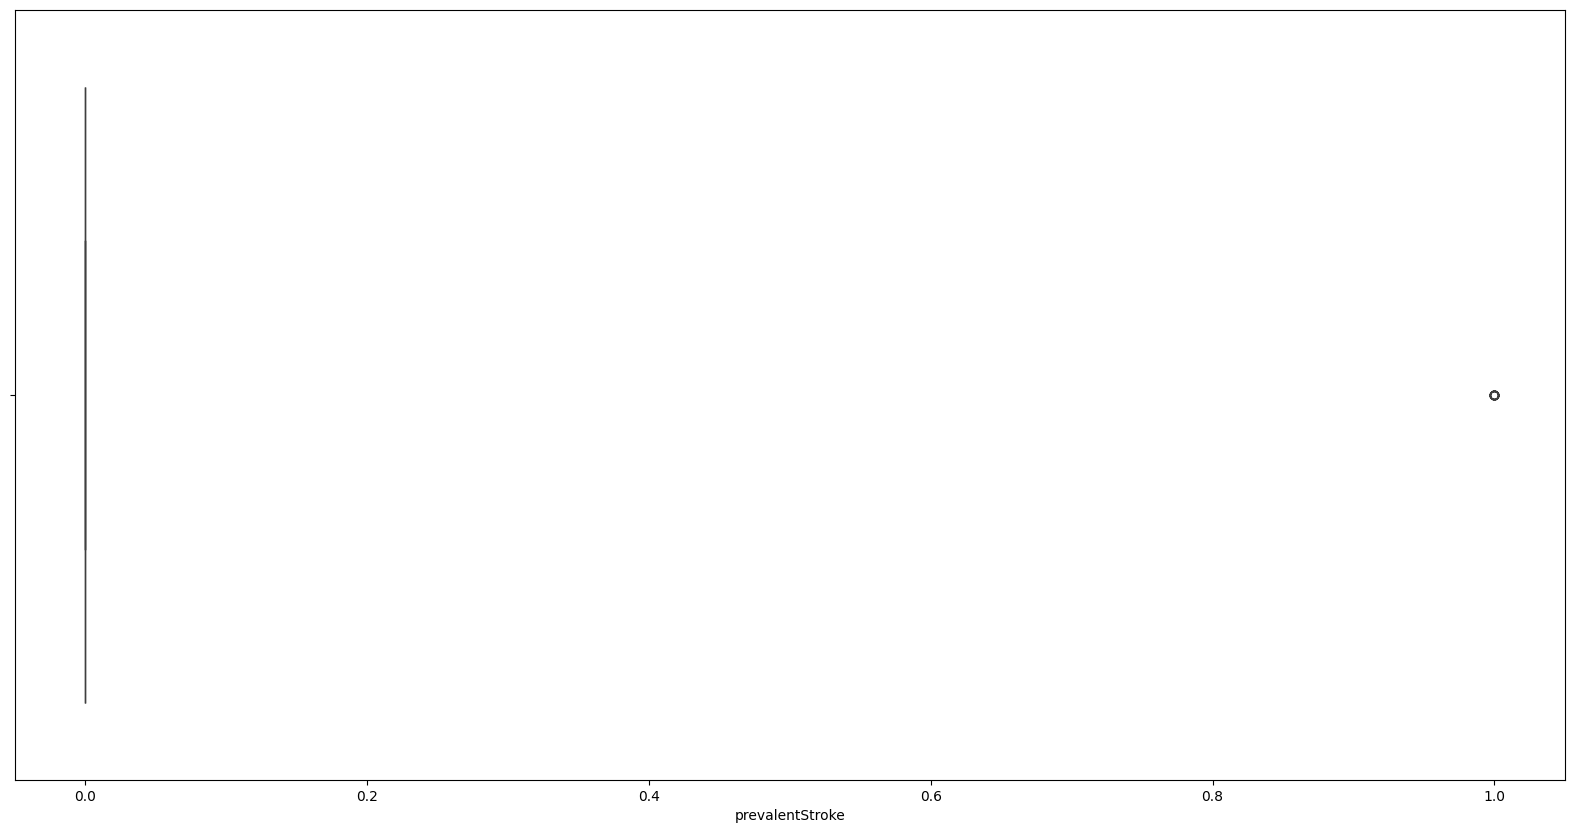

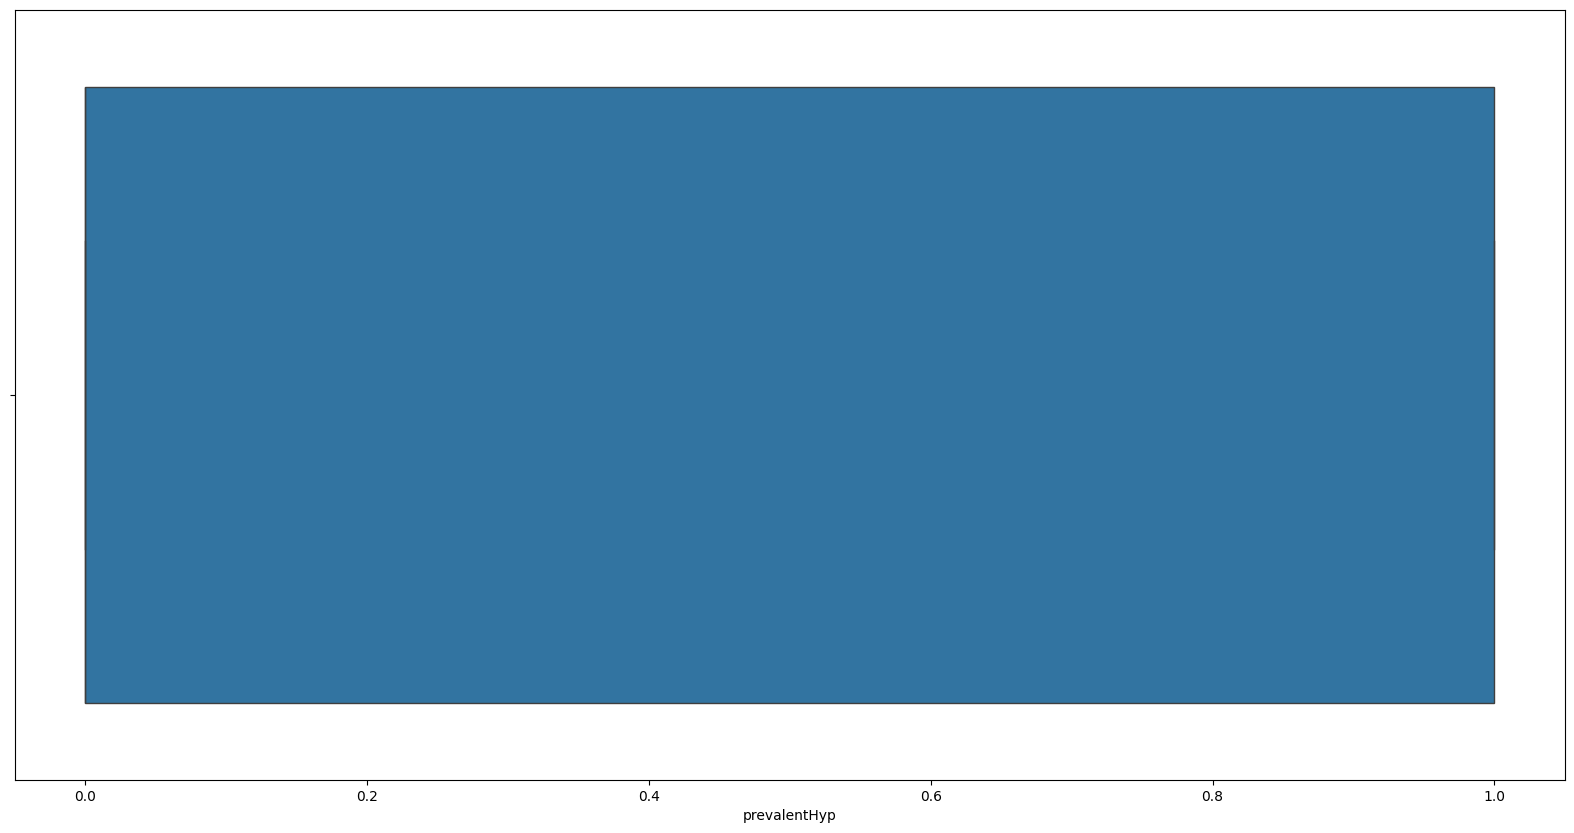

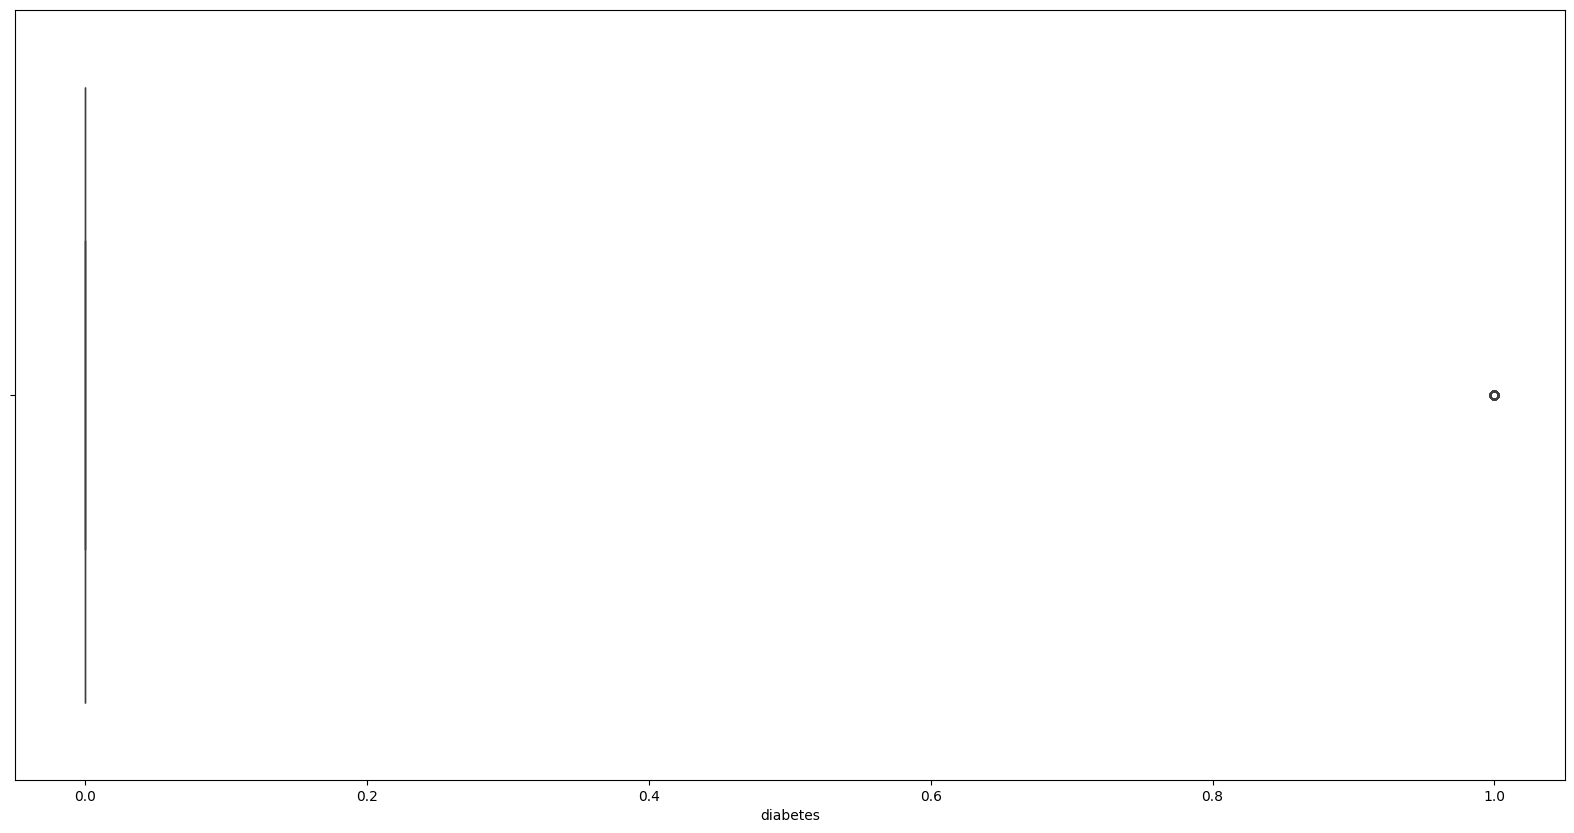

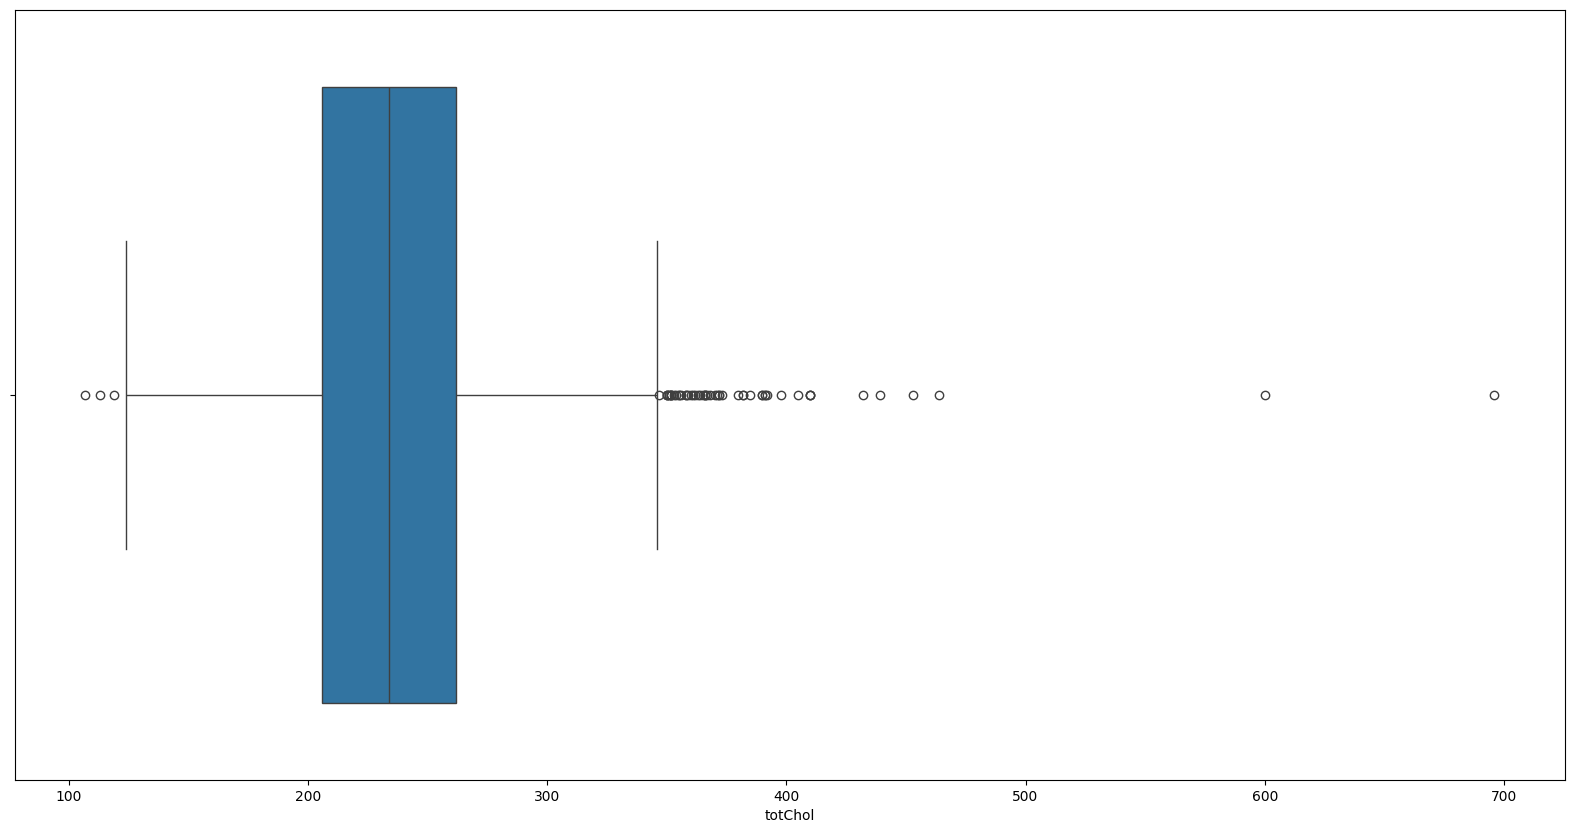

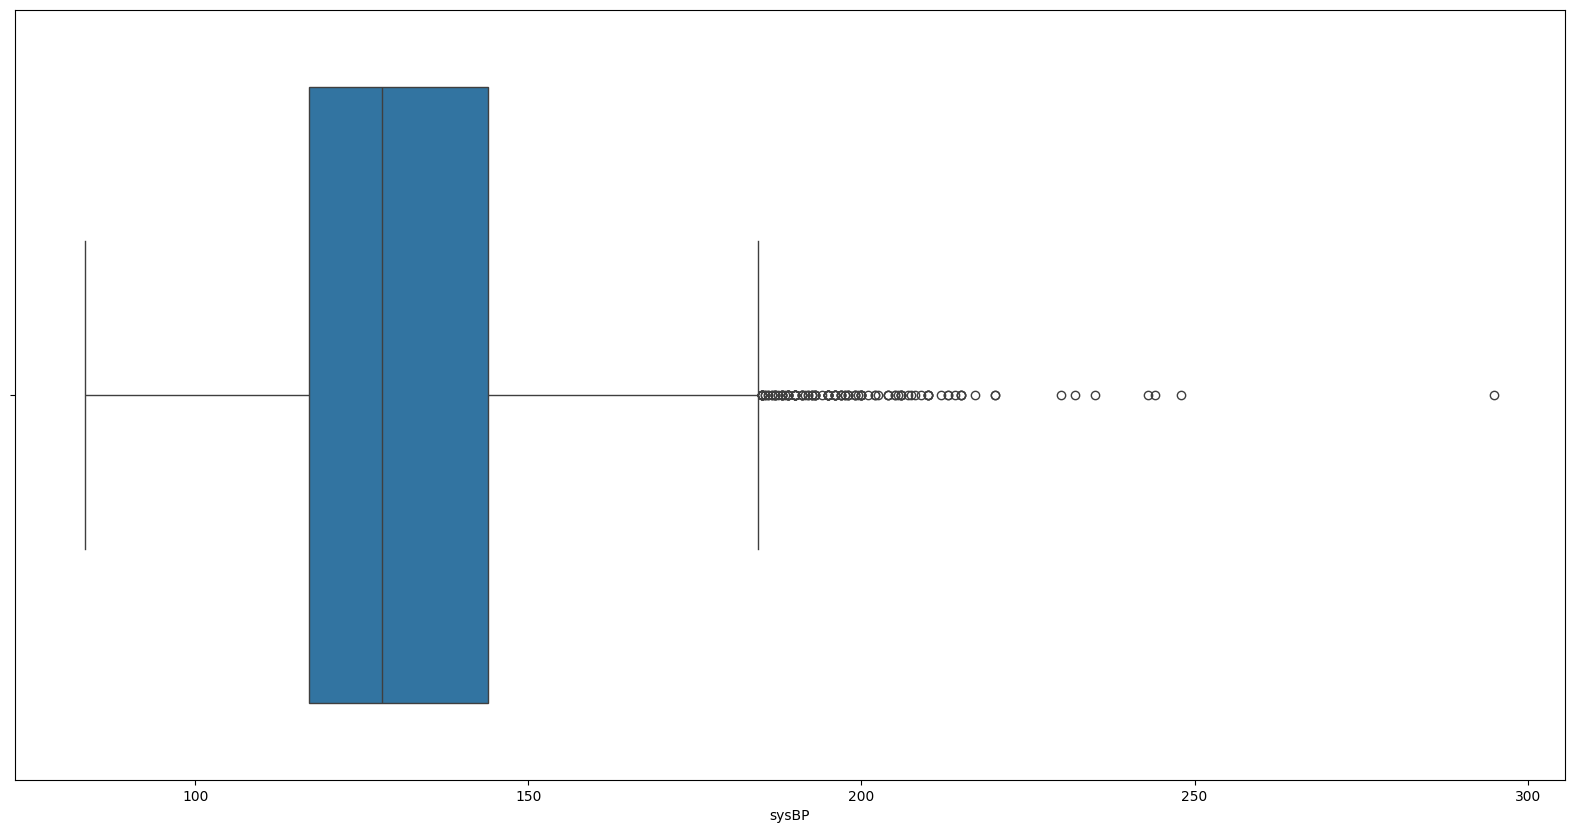

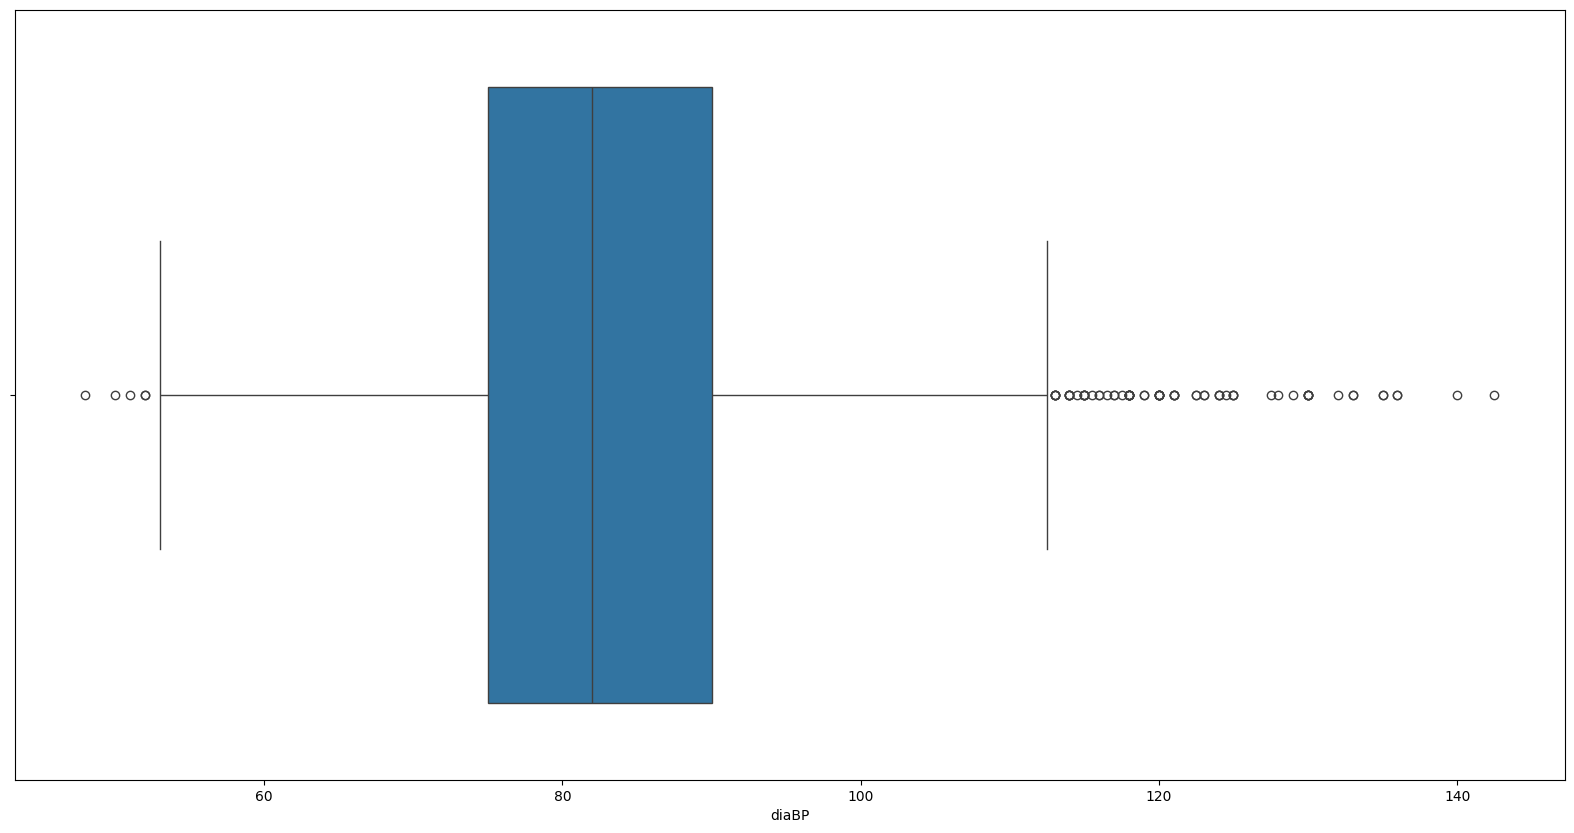

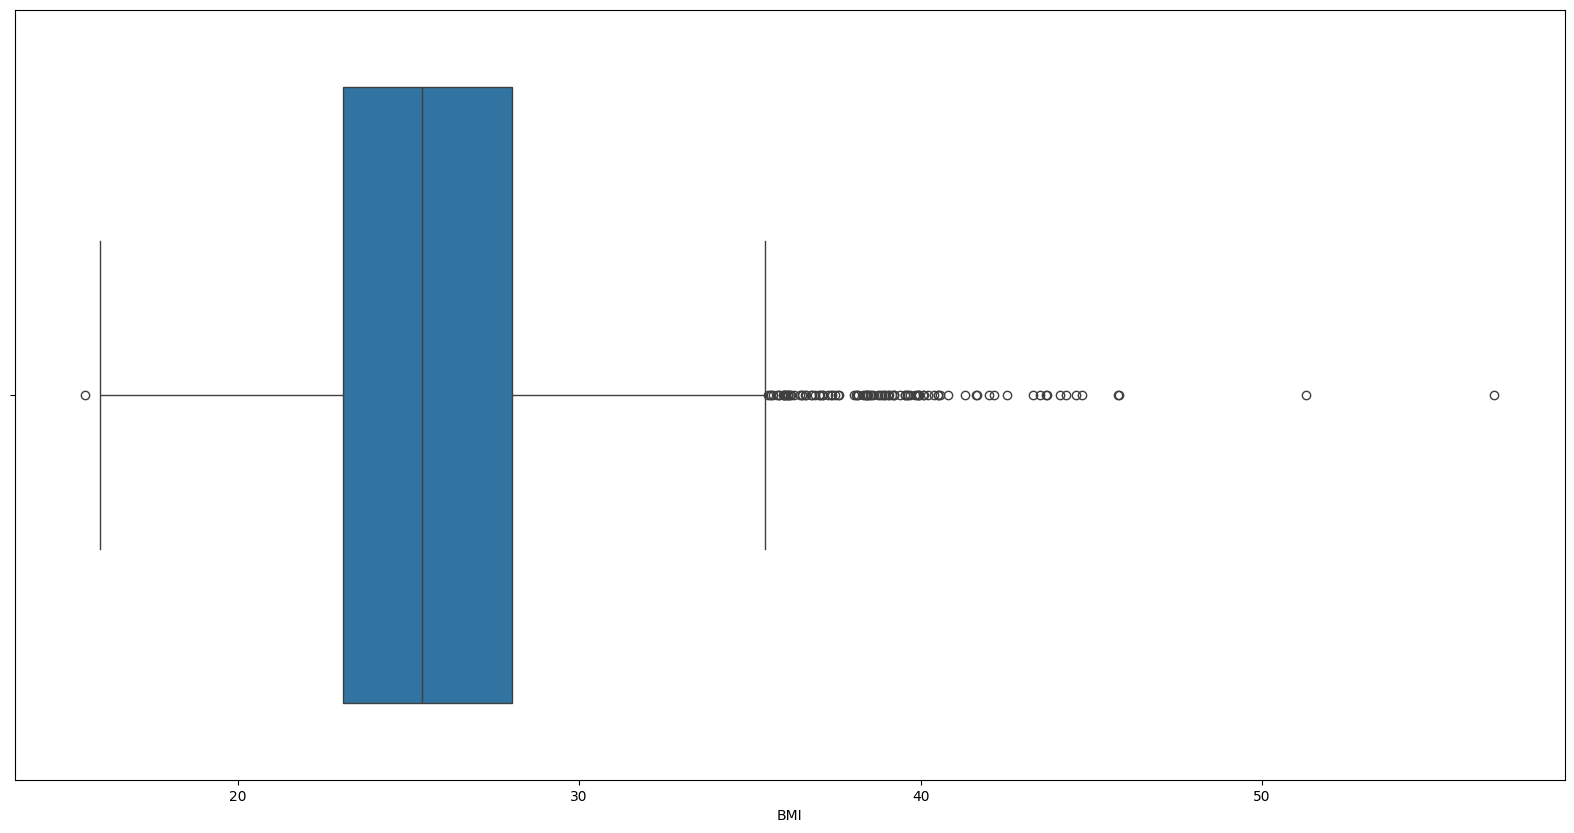

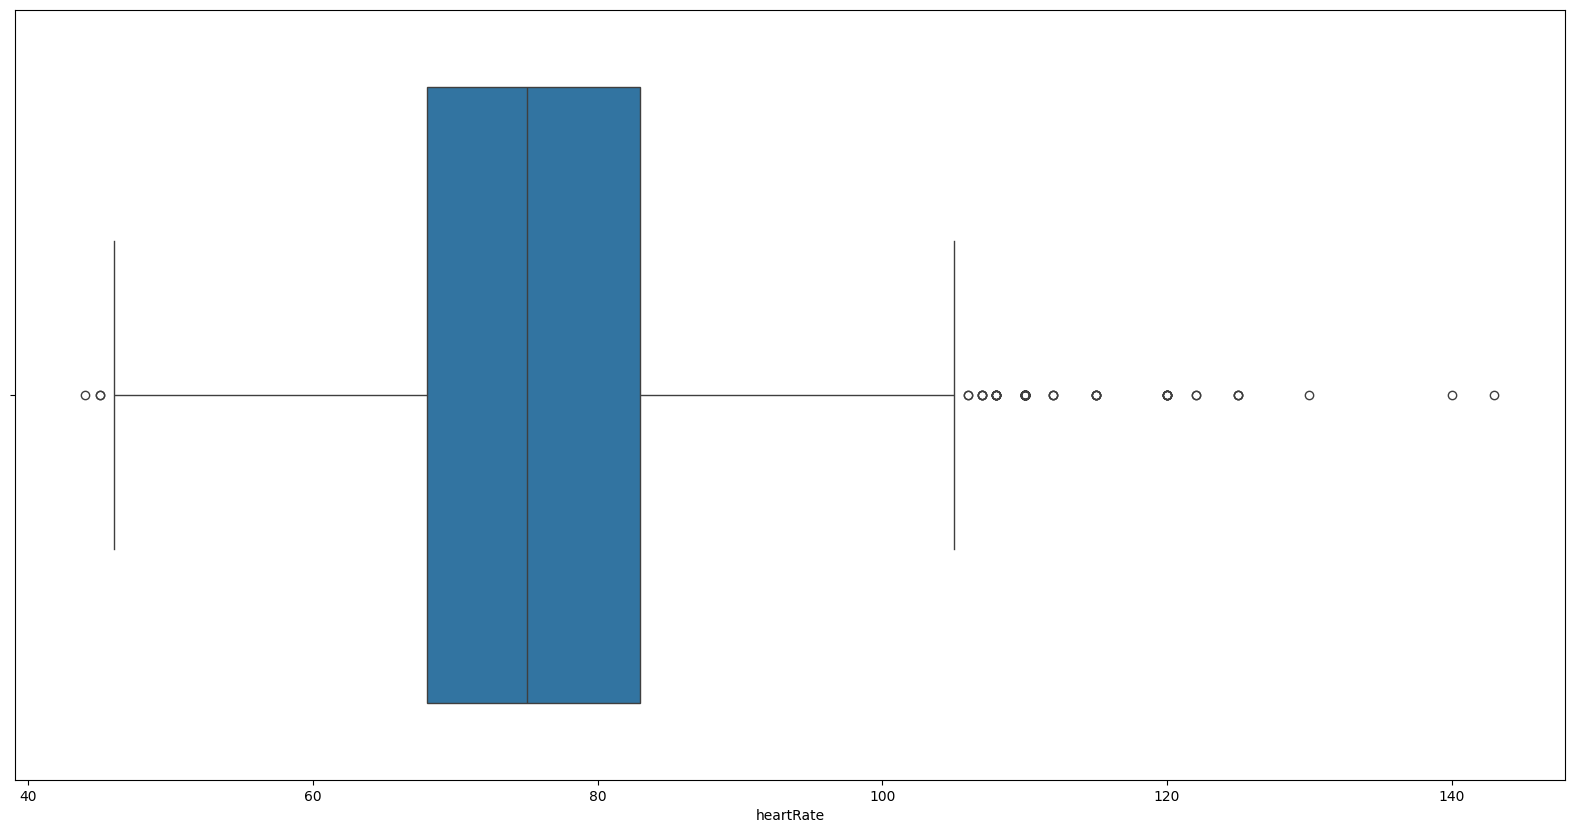

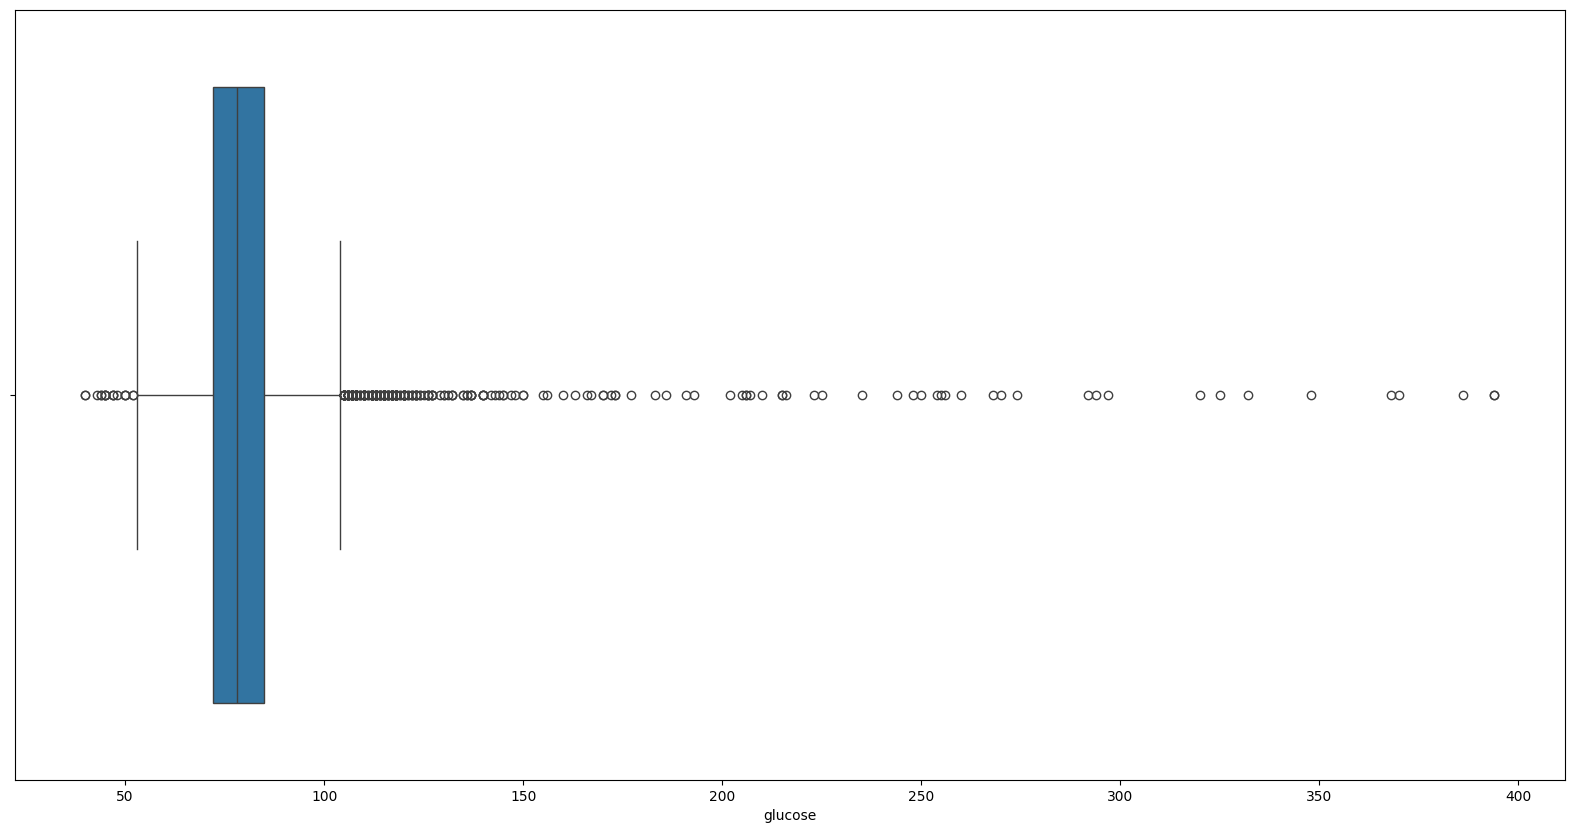

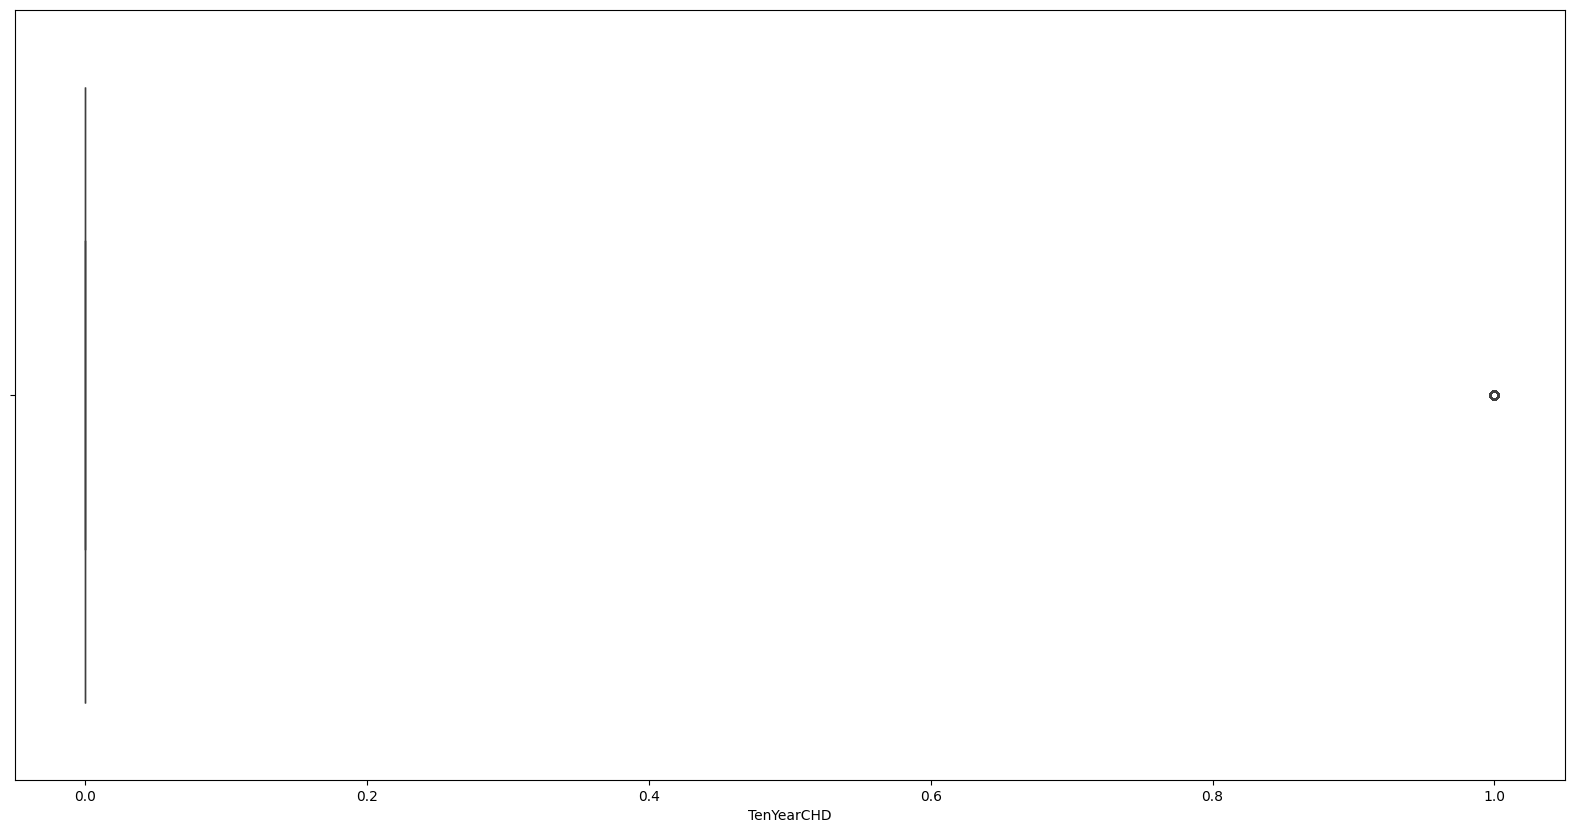

In [11]:
columns_to_clean = df.columns
for col in columns_to_clean:
    plt.figure(figsize=(20,10))
    sns.boxplot(x=col , data= df)
    plt.show()

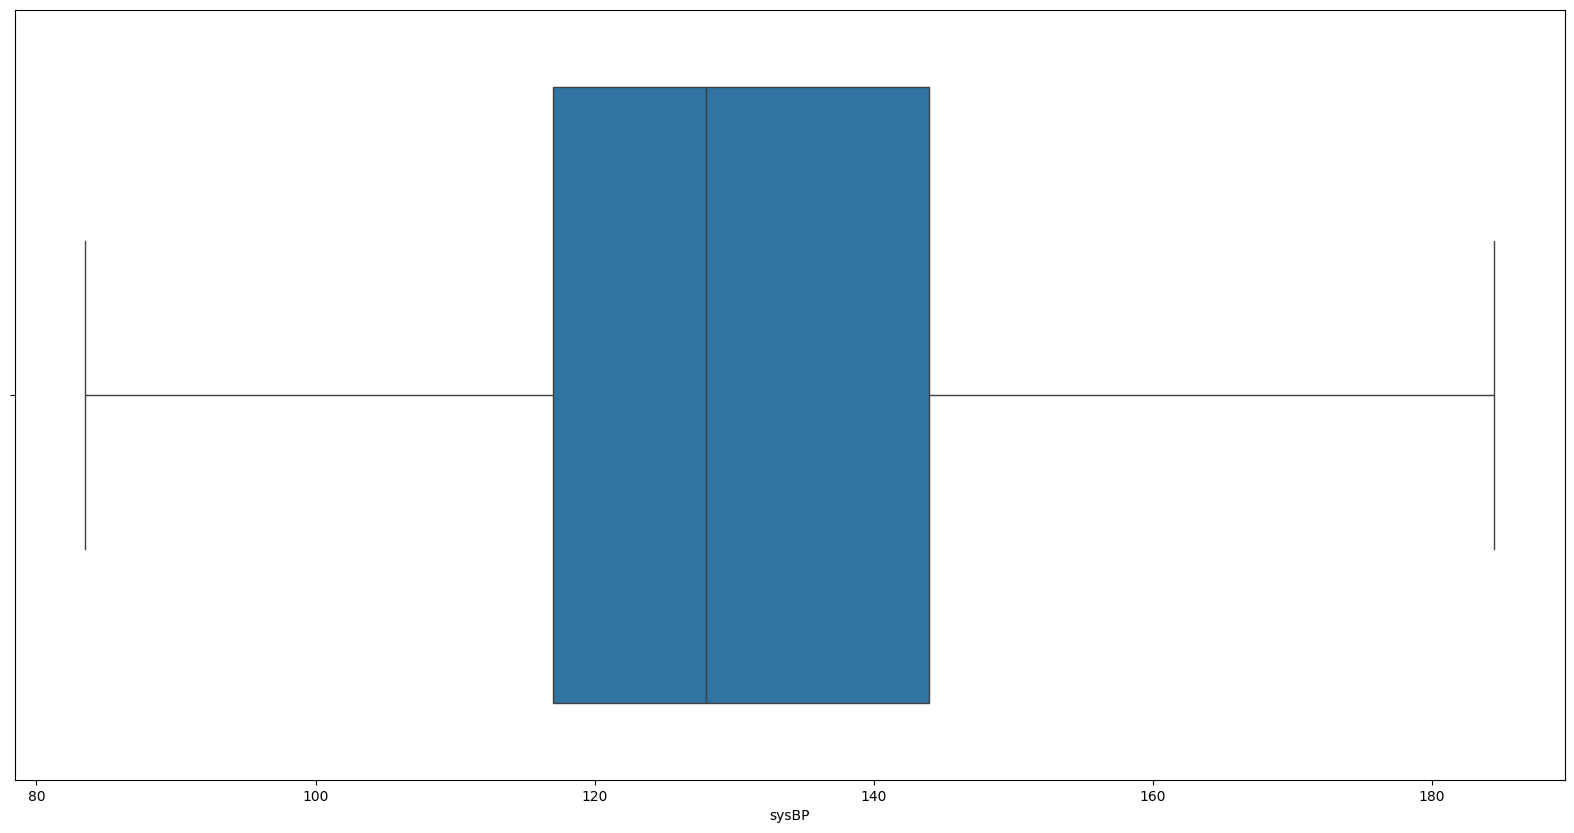

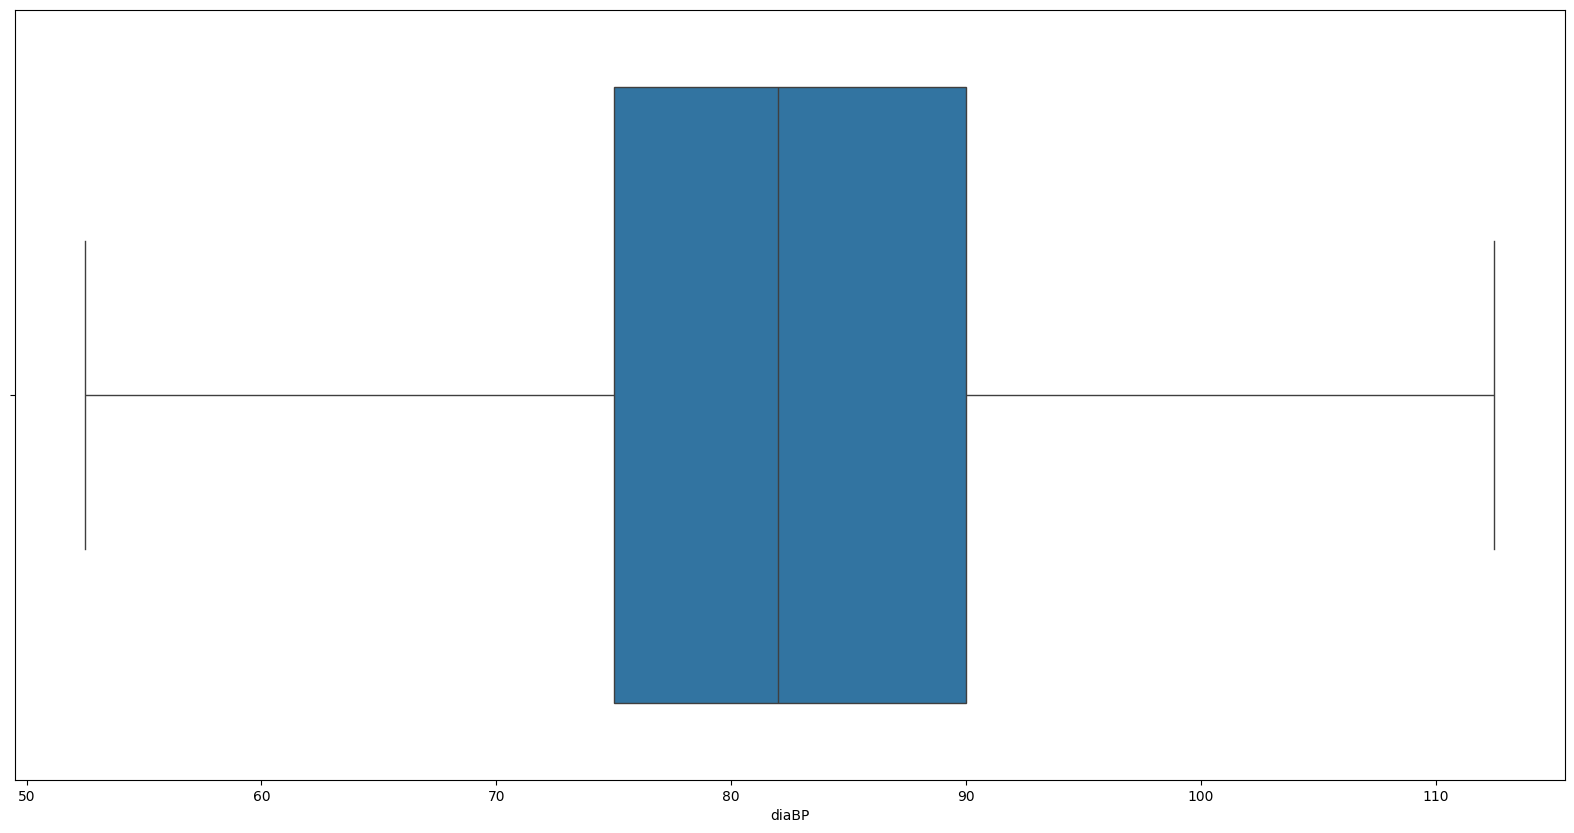

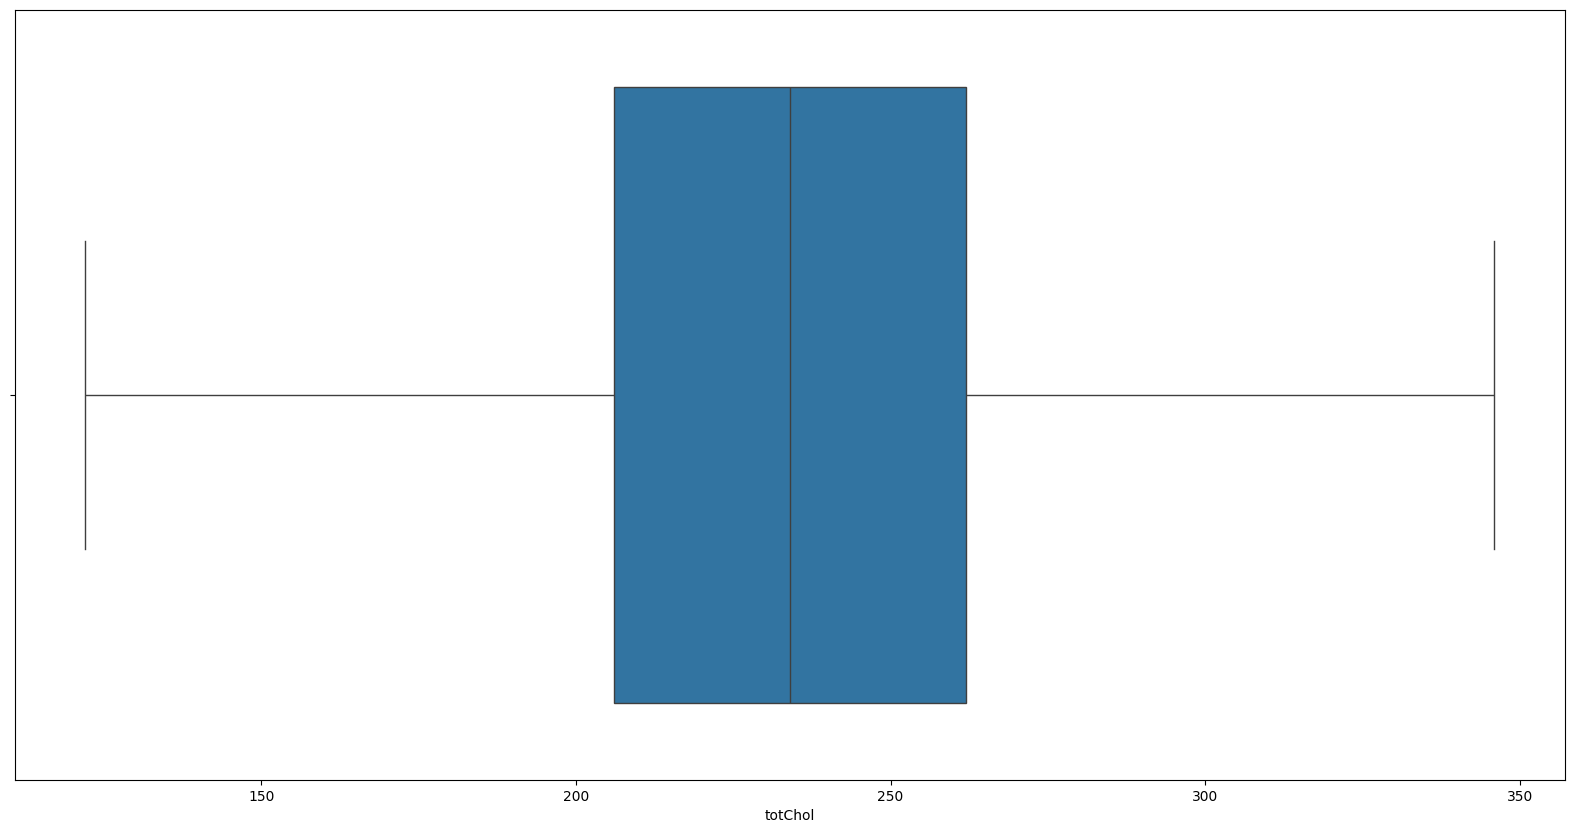

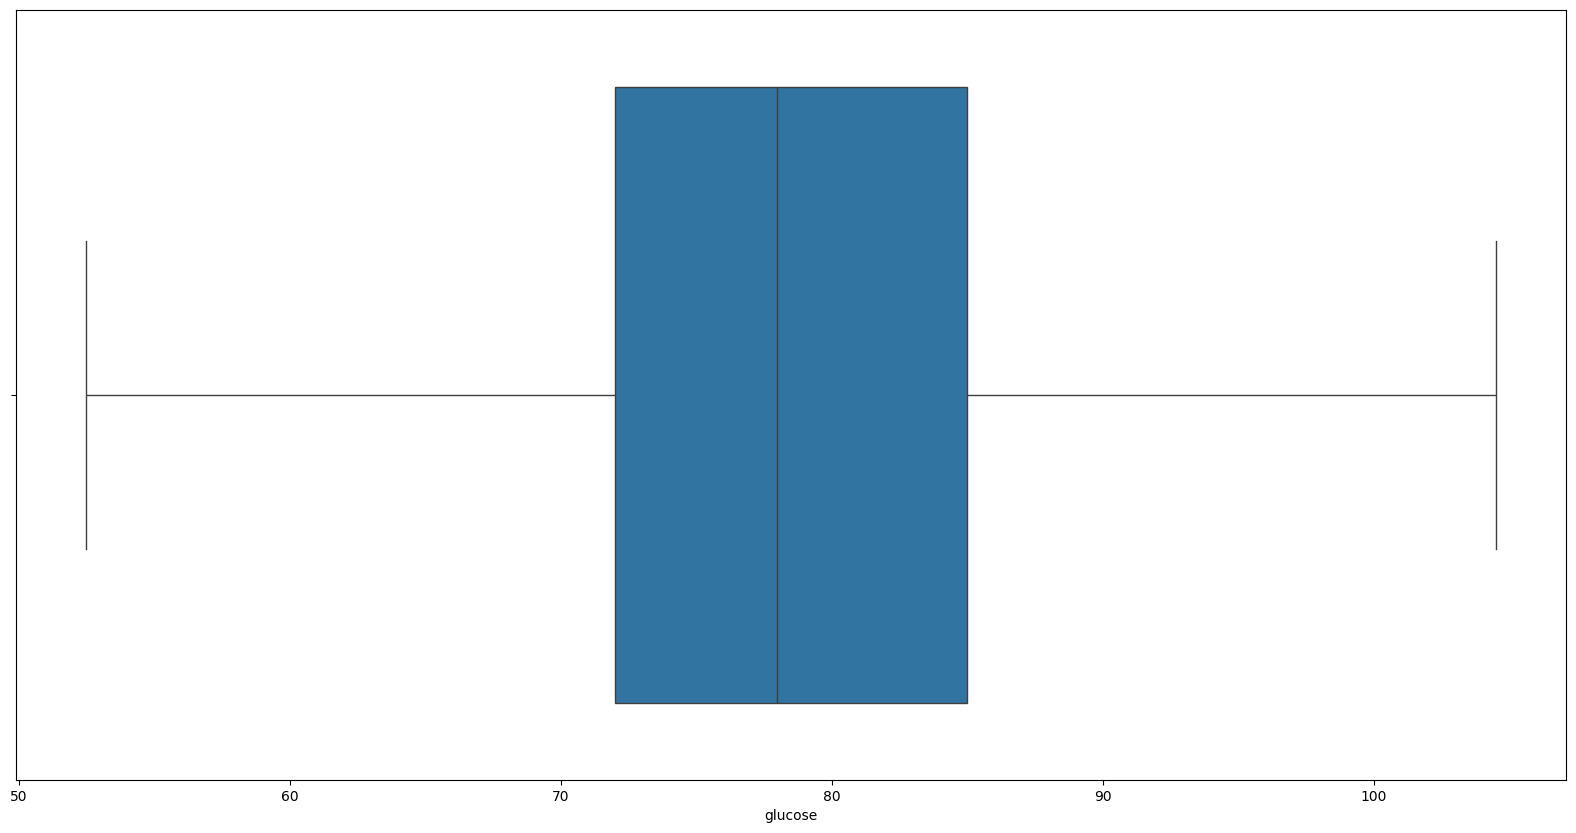

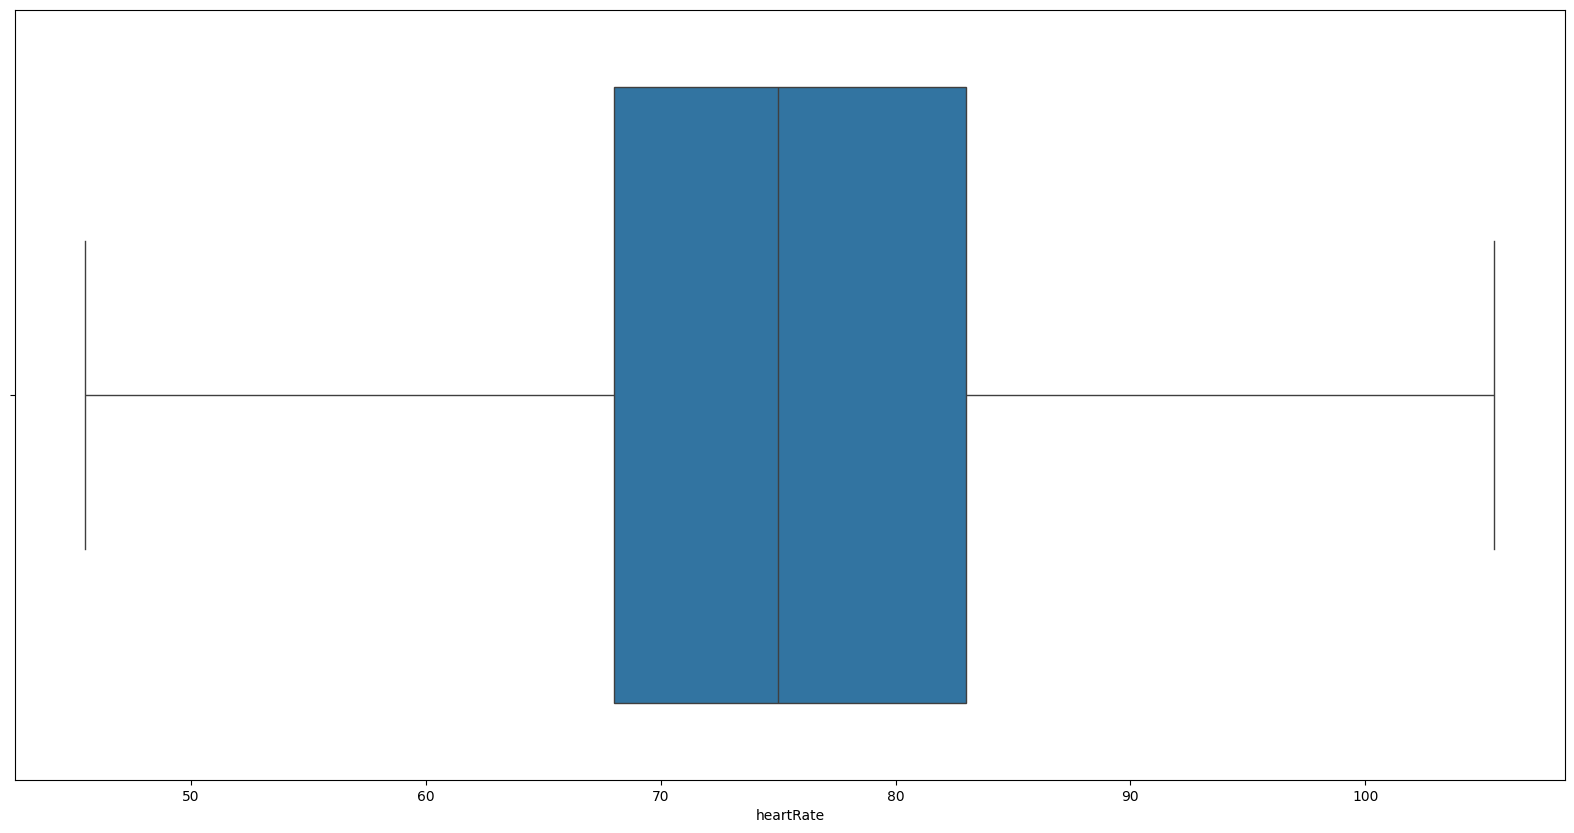

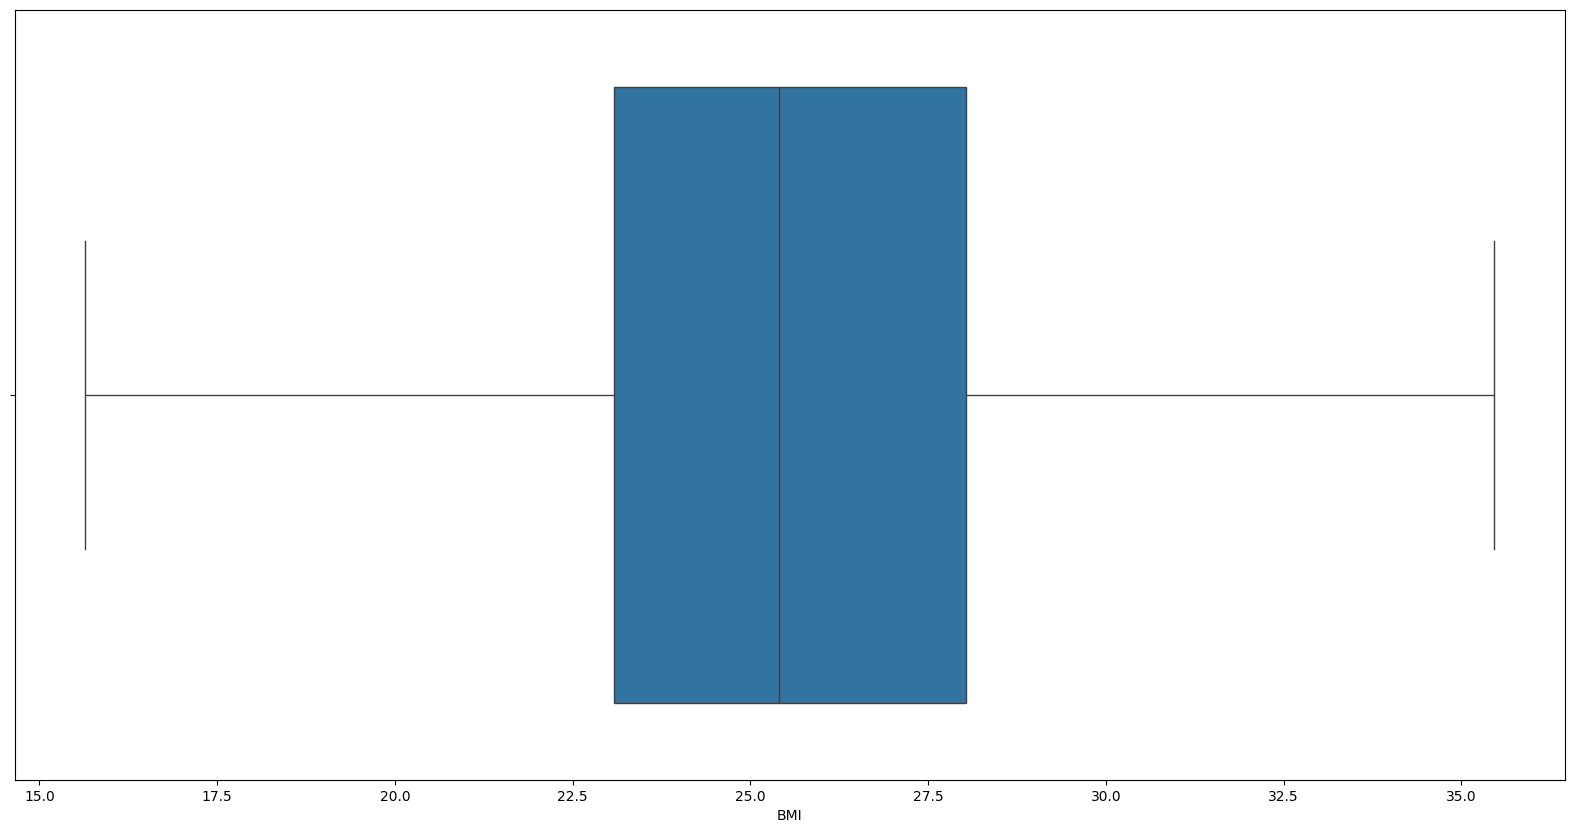

In [12]:
columns_to_clean = ['sysBP', 'diaBP', 'totChol', 'glucose', 'heartRate' , 'BMI']
for col in columns_to_clean:
    plt.figure(figsize=(20,10))
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    sns.boxplot(x=col , data= df)
    plt.show()

# Visualize Data

Distribution of target variable **(TenYearCHD)**

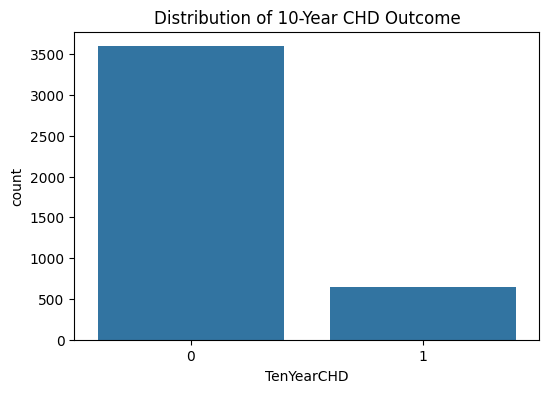

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=df)
plt.title("Distribution of 10-Year CHD Outcome")
plt.show()

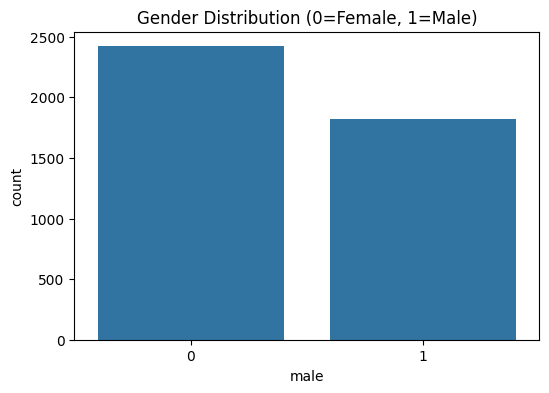

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='male', data=df)
plt.title("Gender Distribution (0=Female, 1=Male)")
plt.show()

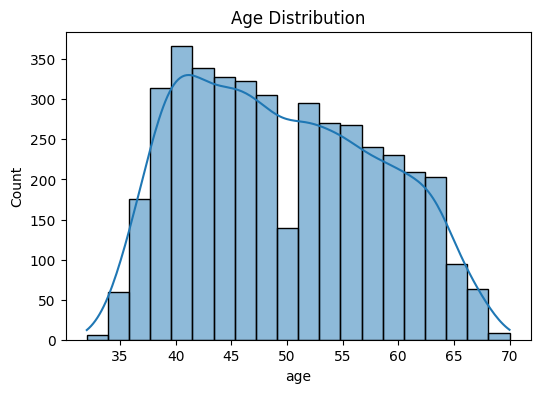

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

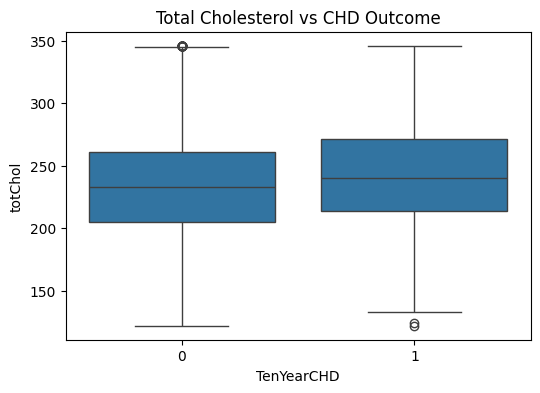

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title("Total Cholesterol vs CHD Outcome")
plt.show()

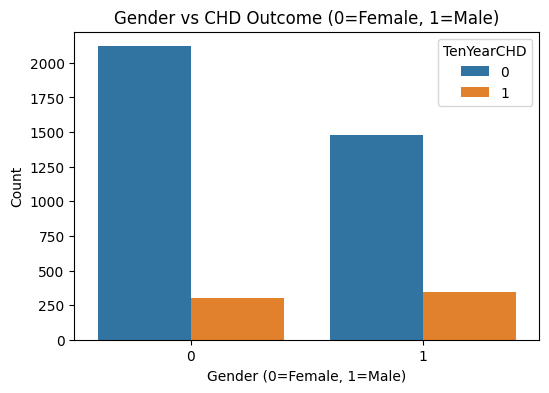

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='male', hue='TenYearCHD', data=df)
plt.title("Gender vs CHD Outcome")
plt.title("Gender vs CHD Outcome (0=Female, 1=Male)")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.show()

The dataset contains **more** **females** than males.

Both genders have fewer cases with CHD (label = 1) compared to those without CHD (label = 0), indicating class imbalance.

However, the number of CHD cases among **males** is slightly **higher** than among females, even though there are fewer males overall in the dataset.

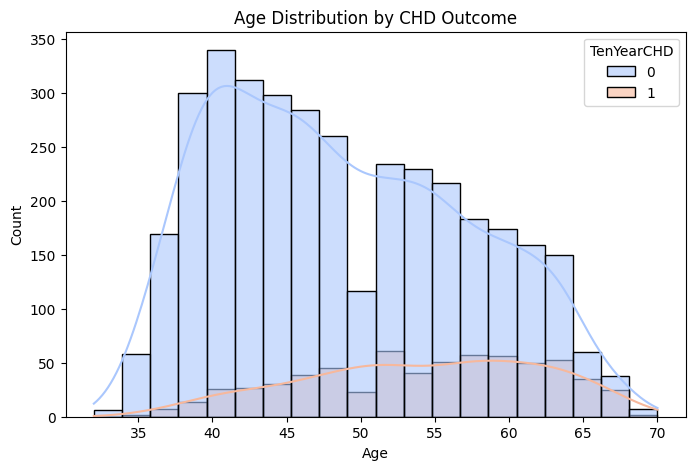

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="TenYearCHD", bins=20, kde=True, palette="coolwarm", alpha=0.6)
plt.title("Age Distribution by CHD Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Most participants are between 40 and 60 years old, with a **peak** around **40–45** years.

The **CHD-positive** group, is much **smaller** compared to the CHD-negative group (class imbalance again).

CHD cases are **more frequent** in older age groups **(50+)**, showing a rising trend with age.

Younger participants **(<40)**  **rarely develop CHD**, while risk steadily increases after 45 and peaks around 55–65  years.

This indicates that **age** is a **strong risk factor** for developing CHD, which aligns with medical knowledge.

#splitting data

In [21]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#handling imbalanced data

In [34]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print("Before resampling:", np.bincount(y_train))
print("After resampling:", np.bincount(y_res))



Before resampling: [2871  521]
After resampling: [2871 2871]


#models

##random forest

In [60]:


#Create Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

# Train the model
rf.fit(X_res, y_res)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(" Accuracy:", acc)
print("\n Classification Report:\n", report)


 Accuracy: 0.8148584905660378

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       725
           1       0.28      0.18      0.22       123

    accuracy                           0.81       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.78      0.81      0.80       848



##logistic regression

In [64]:
#create logristic reg model
log_reg = LogisticRegression(max_iter=5000, class_weight="balanced", solver="liblinear")

# Train the model
log_reg.fit(X_res, y_res)

# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)

Accuracy: 0.6627358490566038

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       725
           1       0.24      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848



##XGBoost

In [62]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

#Create XGBoost model
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

#Train the model
xgb.fit(X_res, y_res)

#Make predictions on test set
y_pred = xgb.predict(X_test)

#Evaluate
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(" Accuracy:", acc)
print("\n Classification Report:\n", report)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Accuracy: 0.6497641509433962

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       725
           1       0.21      0.50      0.29       123

    accuracy                           0.65       848
   macro avg       0.55      0.59      0.53       848
weighted avg       0.79      0.65      0.70       848



In [63]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.6627358490566038
Confusion Matrix:
 [[485 240]
 [ 46  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       725
           1       0.24      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848


Random Forest
Accuracy: 0.8148584905660378
Confusion Matrix:
 [[669  56]
 [101  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       725
           1       0.28      0.18      0.22       123

    accuracy                           0.81       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.78      0.81      0.80       848



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Accuracy: 0.6497641509433962
Confusion Matrix:
 [[490 235]
 [ 62  61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       725
           1       0.21      0.50      0.29       123

    accuracy                           0.65       848
   macro avg       0.55      0.59      0.53       848
weighted avg       0.79      0.65      0.70       848

